# Library

In [52]:
pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 885.1/885.1 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 12.7/12.7 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 317.1/317.1 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 154.7/154.7 kB 9.6 MB/s eta 0:00:00
     -------------------------------------- 292.5/292.5 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 83.1/83.1 kB ? eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29907 sha256


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
# Common Library
import pandas as pd
import numpy as np

# Library Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# KNN Imputer
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

# Load dataset

In [2]:
titanic = pd.DataFrame()
titanic = sns.load_dataset("titanic") # Load titanic dataset from seaborn library
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
# Get information about dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Get description from dataset
titanic.describe() 

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Visualization dataset

[Text(0.5, 1.0, 'Status of Embarked')]

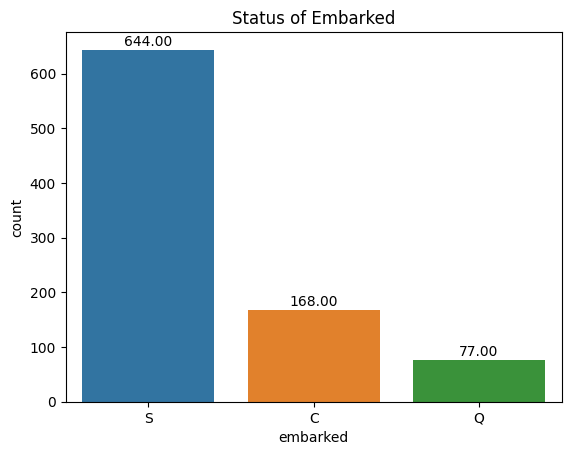

In [5]:
# Barplot Embarked
aplot = sns.countplot(x ='embarked', data = titanic)
for p in aplot.patches:
    aplot.annotate(format(p.get_height(), '.2f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center',va = 'center', xytext = (0,6), textcoords = 'offset points')
aplot.set(title="Status of Embarked")

[Text(0.5, 1.0, 'Status of Deck')]

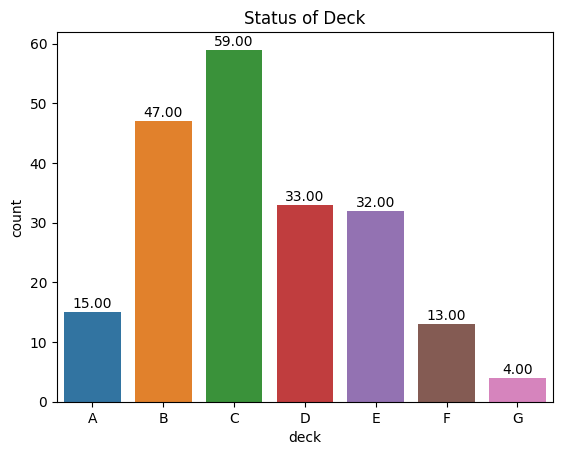

In [6]:
# Barplot deck
dplot = sns.countplot(x ='deck', data = titanic)
for p in dplot.patches:
    dplot.annotate(format(p.get_height(), '.2f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center',va = 'center', xytext = (0,6), textcoords = 'offset points')
dplot.set(title="Status of Deck")

[Text(0.5, 1.0, 'Status of Alive')]

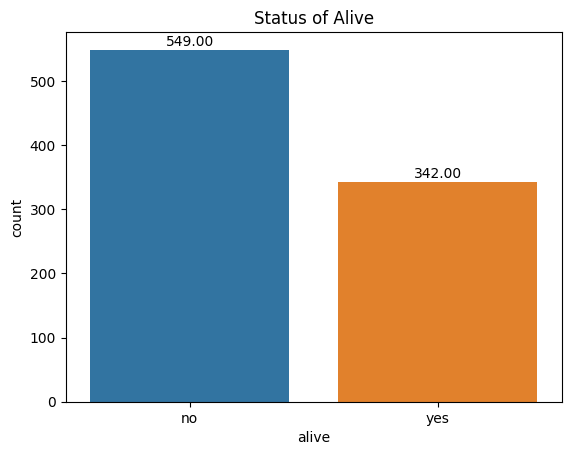

In [7]:
# Barplot Alive
splot = sns.countplot(x ='alive', data = titanic)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center',va = 'center', xytext = (0,6), textcoords = 'offset points')
splot.set(title="Status of Alive")

[Text(0.5, 1.0, 'Status of Alive by Sex')]

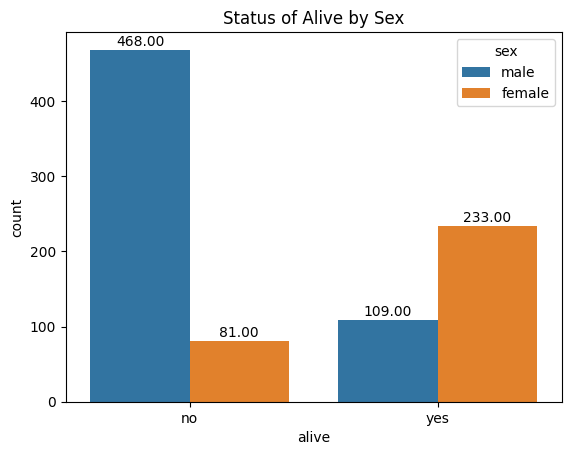

In [8]:
# Barplot Alive by Sex
splot2 = sns.countplot(x ='alive', hue = 'sex',data = titanic)
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center',va = 'center', xytext = (0,6), textcoords = 'offset points')
splot2.set(title="Status of Alive by Sex")

# Missing Value Checking

<AxesSubplot: >

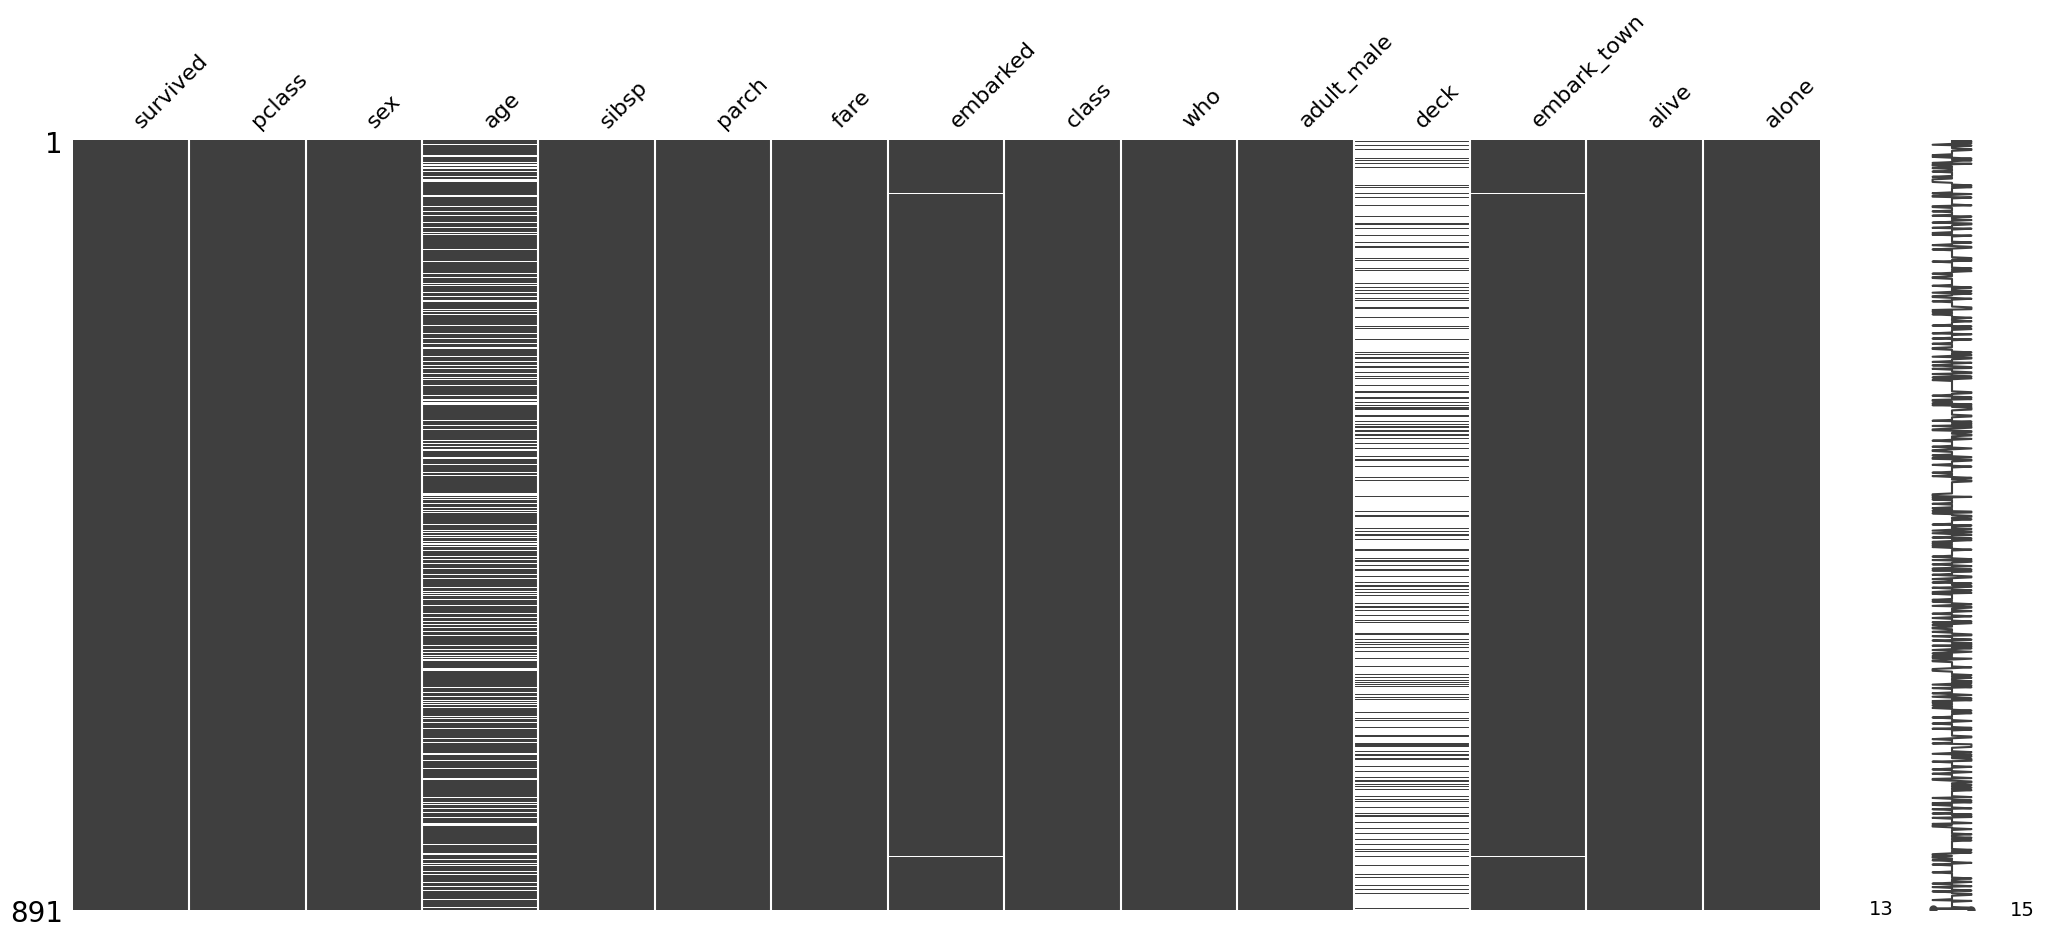

In [9]:
# Checking By Plot
msno.matrix(titanic)

In [10]:
# Get exact amount by column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Deal with missing value

## Ignore the row or column (not recommended)

In [11]:
titanic_droprows = titanic
titanic_dropcols = titanic

### Drop Rows

In [12]:
# By Dropping Rows
titanic_droprows = titanic_droprows.dropna(axis = 0, how ='any')
titanic_droprows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [13]:
titanic_droprows.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Drop Column

In [14]:
# By Dropping Cols
titanic_dropcols = titanic_dropcols.dropna(axis = 1, how ='any')
titanic_dropcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 58.6+ KB


In [15]:
titanic_dropcols.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

## Fill with constant value

In [16]:
titanic_fillcons = titanic
titanic_fillcons.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# Fill Embarked Cols Missing Value with "X"
titanic_fillcons['embarked'].fillna('X',inplace=True)

# Fill embark_town Cols Missing Value with "unidentifed"
titanic_fillcons['embark_town'].fillna('unidentifed',inplace=True)

# Fill age Cols Missing Value with 25
titanic_fillcons['age'].fillna(25,inplace=True)

# Fill deck Cols Missing Value with "unidentifed"
titanic_fillcons['deck'].fillna("G",inplace=True)

In [18]:
titanic_fillcons.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Fill with central tendency for the attribute 

In [19]:
titanic_fillct = titanic
titanic_fillct.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
# Fill Embarked Cols Missing Value with mode
titanic_fillct['embarked'].fillna(titanic_fillct['embarked'].mode()[0],inplace=True)

# Fill embark_town Cols Missing Value with mode
titanic_fillct['embark_town'].fillna(titanic_fillct['embark_town'].mode()[0],inplace=True)

# Fill age Cols Missing Value with mean
titanic_fillct['age'].fillna(titanic_fillct['age'].mean(),inplace=True)

# Fill deck Cols Missing Value with mode
titanic_fillct['deck'].fillna(titanic_fillct['deck'].mode()[0],inplace=True)

In [21]:
titanic_fillct.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Use KNN Algorithm

In [54]:
titanic_KNN = titanic
titanic_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
titanic_KNN['class'] = titanic_KNN['class'].astype(object)
titanic_KNN['deck'] = titanic_KNN['deck'].astype(object)
titanic_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [57]:
encoder = OrdinalEncoder()
imputer = KNN()

# create a list of categorical columns to iterate over
cat_cols = ['embarked','class','deck','who','embark_town','sex','adult_male','alive','alone']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(titanic_KNN[columns])

C:\Users\hasan\AppData\Local\Temp\ipykernel_7404\4266006323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
C:\Users\hasan\AppData\Local\Temp\ipykernel_7404\4266006323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
C:\Users\hasan\AppData\Local\Temp\ipykernel_7404\4266006323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [59]:
# impute data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(titanic_KNN)),columns = titanic_KNN.columns)

Imputing row 1/891 with 0 missing, elapsed time: 0.072
Imputing row 101/891 with 0 missing, elapsed time: 0.072
Imputing row 201/891 with 0 missing, elapsed time: 0.072
Imputing row 301/891 with 0 missing, elapsed time: 0.072
Imputing row 401/891 with 0 missing, elapsed time: 0.072
Imputing row 501/891 with 0 missing, elapsed time: 0.072
Imputing row 601/891 with 0 missing, elapsed time: 0.072
Imputing row 701/891 with 0 missing, elapsed time: 0.073
Imputing row 801/891 with 0 missing, elapsed time: 0.073


c:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [60]:
encode_data

survived  pclass  sex   age  sibsp  parch  fare  embarked  class  who  \
0         0.0     3.0  1.0  22.0    1.0    0.0   7.0       2.0    2.0  1.0   
1         1.0     1.0  0.0  38.0    1.0    0.0  71.0       0.0    0.0  2.0   
2         1.0     3.0  0.0  26.0    0.0    0.0   8.0       2.0    2.0  2.0   
3         1.0     1.0  0.0  35.0    1.0    0.0  53.0       2.0    0.0  2.0   
4         0.0     3.0  1.0  35.0    0.0    0.0   8.0       2.0    2.0  1.0   
..        ...     ...  ...   ...    ...    ...   ...       ...    ...  ...   
886       0.0     2.0  1.0  27.0    0.0    0.0  13.0       2.0    1.0  1.0   
887       1.0     1.0  0.0  19.0    0.0    0.0  30.0       2.0    0.0  2.0   
888       0.0     3.0  0.0  25.0    1.0    2.0  23.0       2.0    2.0  2.0   
889       1.0     1.0  1.0  26.0    0.0    0.0  30.0       0.0    0.0  1.0   
890       0.0     3.0  1.0  32.0    0.0    0.0   8.0       1.0    2.0  1.0   

     adult_male  deck  embark_town  alive  alone  
0           1.0   6.0          2.0    0.0    0.0  
1           0.0   2.0          0.0    1.0    0.0  
2           0.0   6.0          2.0    1.0    1.0  
3           0.0   2.0          2.0    1.0    0.0  
4           1.0   6.0          2.0    0.0    1.0  
..          ...   ...          ...    ...    ...  
886         1.0   6.0          2.0    0.0    1.0  
887         0.0   1.0          2.0    1.0    1.0  
888         0.0   6.0          2.0    0.0    0.0  
889         1.0   2.0          0.0    1.0    1.0  
890         1.0   6.0          1.0    0.0    1.0  

[891 rows x 15 columns]

In [61]:
encode_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64